In [15]:
import openeo

import matplotlib.pyplot as plt
from matplotlib import gridspec
import xarray as xr

In [16]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [17]:
s1 = connection.load_collection(
    "SENTINEL1_GRD",
    temporal_extent=["2017-05-03", "2017-08-03"],
    spatial_extent={"west": 80.499, "south": 16.474, "east": 80.670, "north": 16.598},
    bands=["VV", "VH"],
)

In [18]:
s1 = s1.sar_backscatter(coefficient="sigma0-ellipsoid")

In [19]:
rvi = (4 * s1.band("VH")) / (s1.band("VV") + s1.band("VH"))

In [20]:
rvi.download("RVI.nc")

In [21]:
ds = xr.load_dataset("RVI.nc")
data = ds[["var"]].to_array(dim="bands")

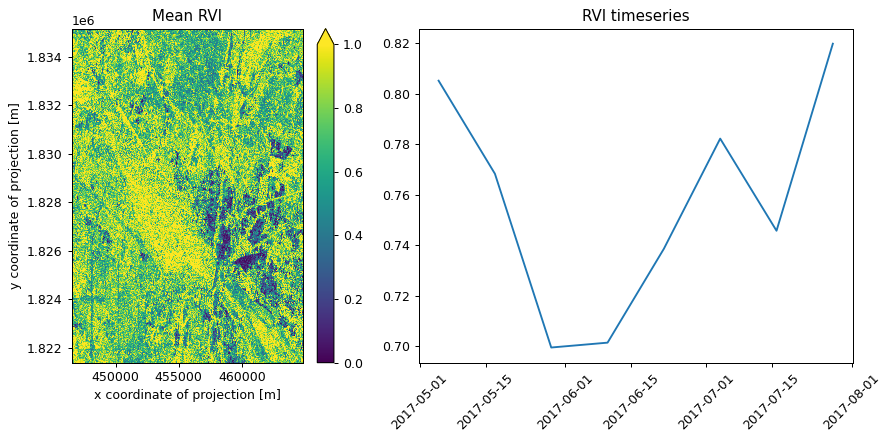

In [22]:
fig = plt.figure(figsize=(10, 5), dpi=90)
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3])

# Plot the image
ax0 = plt.subplot(gs[0])
data.mean(dim="t")[0].plot.imshow(vmin=0, vmax=1, ax=ax0)
ax0.set_title("Mean RVI")

# Plot the timeseries
ax1 = plt.subplot(gs[1])
ax1.plot(data.t.to_numpy(), data.mean(dim=("x", "y"))[0])
ax1.set_title("RVI timeseries")

plt.xticks(rotation=45)
plt.tight_layout()

In [23]:
from openeo.extra.spectral_indices import compute_indices

In [24]:
indices = compute_indices(
    s1,
    indices=["DpRVIVV"],
)

In [25]:
indices.download("RVI_direct.nc")

In [26]:
ds_indices = xr.load_dataset("RVI_direct.nc")
data = ds_indices[["DpRVIVV"]].to_array(dim="bands")

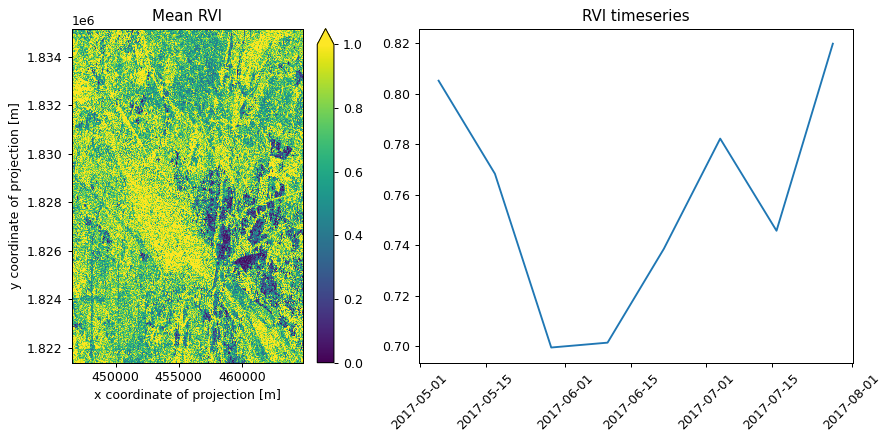

In [27]:
fig = plt.figure(figsize=(10, 5), dpi=90)
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3])

# Plot the image
ax0 = plt.subplot(gs[0])
data.mean(dim="t")[0].plot.imshow(vmin=0, vmax=1, ax=ax0)
ax0.set_title("Mean RVI")

# Plot the timeseries
ax1 = plt.subplot(gs[1])
ax1.plot(ds_indices.t.to_numpy(), data.mean(dim=("x", "y"))[0])
ax1.set_title("RVI timeseries")

plt.xticks(rotation=45)
plt.tight_layout()

In [28]:
from openeo.extra.spectral_indices import compute_indices